# Data visualizations

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

sns.set_theme()

In [2]:
# Load dataset
filename = 'sales_data.csv'
sales = pd.read_csv(filename, index_col=0)

In [3]:
sales.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7059 entries, 0 to 7058
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      7059 non-null   int64  
 1   Item_Identifier            7059 non-null   object 
 2   Item_Weight                7059 non-null   float64
 3   Item_Fat_Content           7059 non-null   object 
 4   Item_Visibility            7059 non-null   float64
 5   Item_Type                  7059 non-null   object 
 6   Item_MRP                   7059 non-null   float64
 7   Outlet_Identifier          7059 non-null   object 
 8   Outlet_Establishment_Year  7059 non-null   int64  
 9   Outlet_Size                7059 non-null   object 
 10  Outlet_Location_Type       7059 non-null   object 
 11  Outlet_Type                7059 non-null   object 
 12  Item_Outlet_Sales          7059 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

### Average Item Sales grouped by Location Type

Text(0.5, 1.0, 'Average Item Sales by Location Type')

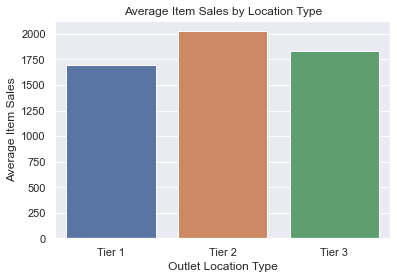

In [69]:
viz1 = sales.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
ax = sns.barplot(x=viz1.index, y=viz1.iloc[:]);
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Average Item Sales')
ax.set_title('Average Item Sales by Location Type')

### Average Item Sales grouped by Outlet Type

Text(0.5, 1.0, 'Average Item Sales by Outlet Type')

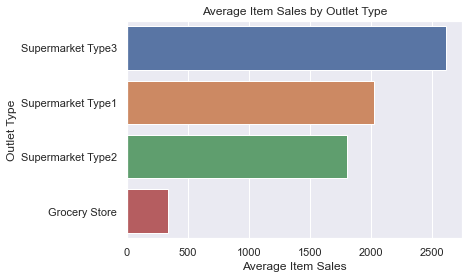

In [6]:
viz2 = sales.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
ax2 = sns.barplot(y=viz2.index, x=viz2[:], orient='h')
ax2.set_xlabel('Average Item Sales')
ax2.set_ylabel('Outlet Type')
ax2.set_title('Average Item Sales by Outlet Type')

### Average Item Sales grouped by Outlet Size

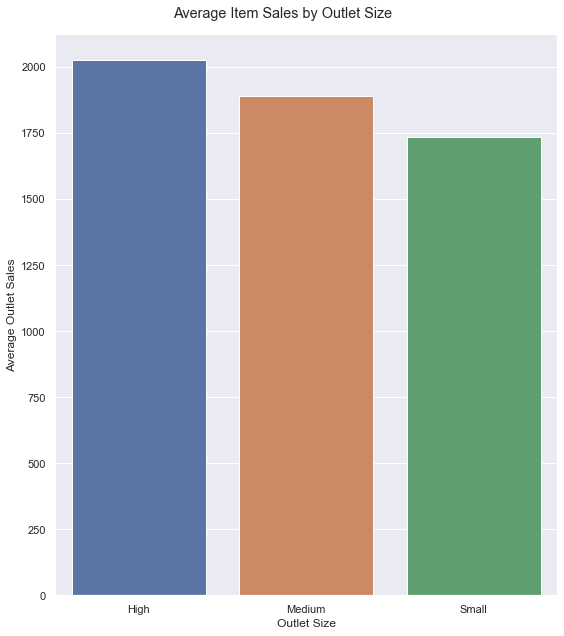

In [71]:
fig, ax = plt.subplots(1,1)
viz3 = sales.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
ax3 = sns.barplot(x=viz3.index, y=viz3)
ax3.set_ylabel('Average Outlet Sales')
ax3.set_xlabel('Outlet Size')
ax3.set_title('Average Item Sales by Outlet Size')

### Total Item Sales grouped by Item_Type

Text(0.5, 1.0, 'Total Sales by Item Type')

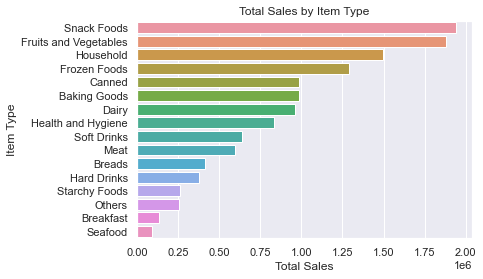

In [64]:
viz4 = sales.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
ax4 = sns.barplot(y=viz4.index, x=viz4, orient='h');
ax4.set_ylabel('Item Type')
ax4.set_xlabel('Total Sales')
ax4.set_title('Total Sales by Item Type')

In [9]:
### Distribution of Stores. Groupby location types and outlet types

### Item sales grouped by fat content.

Text(0.5, 1.0, 'Item Sales by Fat Content')

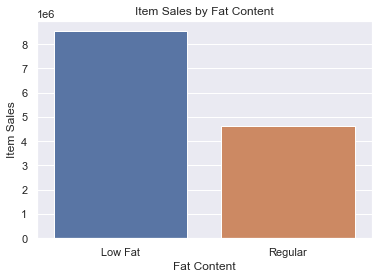

In [10]:
viz5 = sales.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum();
ax5 = sns.barplot(x=viz5.index, y=viz5)
ax5.set_ylabel('Item Sales')
ax5.set_xlabel('Fat Content')
ax5.set_title('Item Sales by Fat Content')

## Misc. Statistics

### Unique items sold in all stores grouped by type.

Text(0.5, 1.0, 'Unique Items by Type')

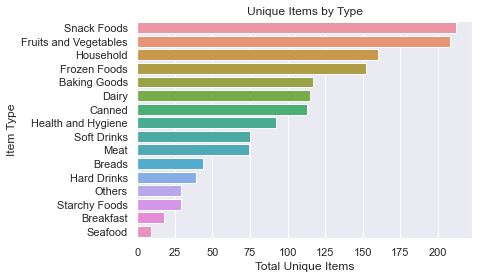

In [11]:
viz6 = sales.drop_duplicates(subset='Item_Identifier')\
.groupby('Item_Type')['Item_Identifier'].count().sort_values(ascending=False)
ax6 = sns.barplot(x=viz6, y=viz6.index, orient='h')
ax6.set_xlabel('Total Unique Items')
ax6.set_ylabel('Item Type')
ax6.set_title('Unique Items by Type')

### Types of Items in Top 100 Most Selling Items

Text(0.5, 1.0, 'Top 100 Selling Most Selling Products by Type')

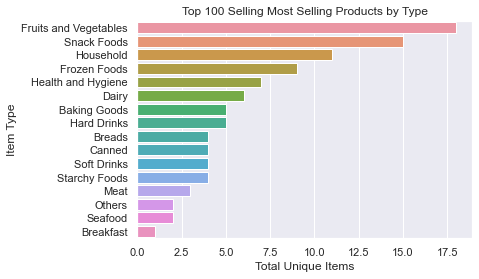

In [12]:
top100_items = sales.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values().tail(100).index.to_list()
top100_sales = sales.query('Item_Identifier in @top100_items')
viz7 = \
top100_sales.drop_duplicates(subset='Item_Identifier').\
groupby(['Item_Type'])['Item_Identifier'].count().sort_values(ascending=False)


ax7 = sns.barplot(x=viz7, y=viz7.index, orient='h')
ax7.set_ylabel('Item Type')
ax7.set_xlabel('Total Unique Items')
ax7.set_title('Top 100 Selling Most Selling Products by Type')

### Best Performing Outlets

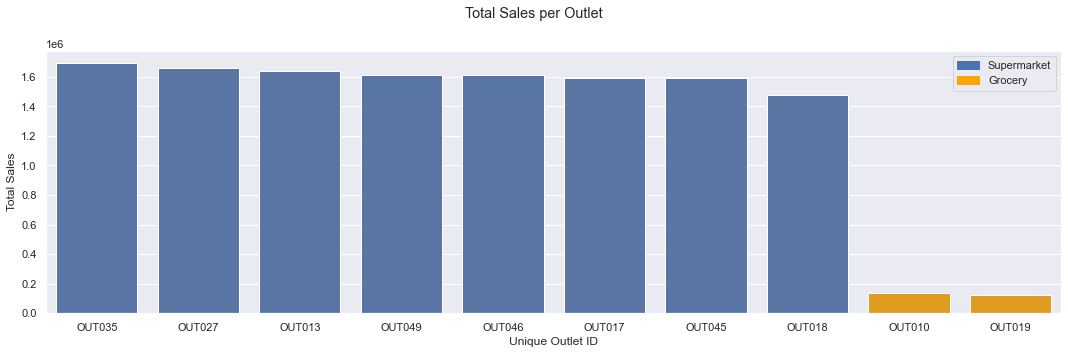

In [54]:
gb = sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1)

clrs = ['b']*8 + ['orange']*2
blue = patches.Patch(color='b', label='Supermarket')
orange = patches.Patch(color='orange', label='Grocery')
sns.barplot(x=gb.index, y=gb, ax=ax, palette=clrs)
ax.set(
    xlabel=('Unique Outlet ID'), ylabel=('Total Sales')
)
ax.legend(handles=[blue, orange])

fig.set(
    figheight=(5),
    figwidth=(15)
)

fig.suptitle('Total Sales per Outlet')
fig.tight_layout()